In [ ]:
# === 1. Libraries ===

# Required libraries: 
# pip install yfinance matplotlib plotly numpy pandas seaborn

import yfinance as yf             # For pulling financial market data
import matplotlib.pyplot as plt   # For basic visualizations (e.g. line charts)
import plotly.express as px       # For interactive visualizations (e.g. scatter plots)
import datetime as dt             # For date/time handling
import numpy as np                # For numerical operations and simulations
import pandas as pd               # For data manipulation and analysis
import seaborn as sns             # For more advanced plotting

In [4]:
# === 2. Constituent Securities ===

# > USER INPUT: Define the portfolio tickers (Yahoo Finance format).
# > These are just example tickers - adjust based on your portfolio

tickers = ['URTH', 'XDWT.SW', '4GLD.DE', 'IXC']  # Example: Global equity & commodity ETF mix

print(f"Selected Tickers: {tickers}")


Selected Tickers: ['URTH', 'XDWT.SW', '4GLD.DE', 'IXC']


In [ ]:
# === 3. Data Retrieval & Handling ===

# > USER INPUT: Define date range for historical data
start_date = dt.datetime(2013, 1, 1)
end_date = dt.datetime.now()

# Download OHLCV data (Open, High, Low, Close, Volume) for the selected tickers
full_data_df = yf.download(tickers, start=start_date, end=end_date, auto_adjust=True)


# Flatten multi-level column headers (e.g., ('Close', 'URTH') → 'Close_URTH') for easier DataFrame handling
full_data_df.columns = ['{}_{}'.format(col[0], col[1]) for col in full_data_df.columns]

# Fill missing values both forward and backward (time-series consistency)
full_data_df = full_data_df.ffill().bfill()
full_data_df.head()

[*********************100%***********************]  4 of 4 completed


,Close_4GLD.DE,Close_IXC,Close_URTH,Close_XDWT.SW,High_4GLD.DE,High_IXC,High_URTH,High_XDWT.SW,Low_4GLD.DE,Low_IXC,Low_URTH,Low_XDWT.SW,Open_4GLD.DE,Open_IXC,Open_URTH,Open_XDWT.SW,Volume_4GLD.DE,Volume_IXC,Volume_URTH,Volume_XDWT.SW
Date,,,,,,,,,,,,,,,,,,,,
2013-01-02,41.209999,24.232199,44.601189,10.87646,41.220001,24.238398,45.719192,10.87646,40.709999,23.947115,44.601189,10.87646,40.720001,24.126842,45.711264,10.87646,207421.0,212400.0,1300.0,0.0
2013-01-03,41.180000,24.120642,45.624035,10.87646,41.340000,24.318964,45.624035,10.87646,41.119999,24.077259,45.600246,10.87646,41.240002,24.102050,45.600246,10.87646,74398.0,99300.0,700.0,0.0
2013-01-04,40.439999,24.368542,45.061081,10.84722,40.880001,24.387133,45.481322,10.84722,40.220001,24.120641,44.577405,10.84722,40.660000,24.120641,45.481322,10.84722,1001101.0,46000.0,5800.0,0.0
2013-01-07,40.419998,24.182619,44.799419,10.81666,40.880001,24.789973,44.799419,10.81666,40.419998,24.064868,44.799419,10.81666,40.830002,24.176420,44.799419,10.81666,125353.0,128100.0,100.0,0.0
2013-01-08,40.740002,24.021482,44.696331,10.77378,40.759998,24.114446,44.720120,10.77378,40.419998,23.922323,44.656686,10.77378,40.470001,24.114446,44.656686,10.77378,114193.0,291000.0,400.0,0.0


In [6]:
# Extract columns with raw (unadjusted) closing prices
# These columns follow the naming convention 'Close_TICKER'
close_columns = [col for col in full_data_df.columns if col.startswith('Close_')]

# Create a DataFrame that only contains unadjusted closing prices
close_df = full_data_df[close_columns].copy()
close_df.head()


,Close_4GLD.DE,Close_IXC,Close_URTH,Close_XDWT.SW
Date,,,,
2013-01-02,41.209999,24.232199,44.601189,10.87646
2013-01-03,41.180000,24.120642,45.624035,10.87646
2013-01-04,40.439999,24.368542,45.061081,10.84722
2013-01-07,40.419998,24.182619,44.799419,10.81666
2013-01-08,40.740002,24.021482,44.696331,10.77378


In [ ]:
# === 4. Simulation Preparation ===

# > USER INPUT: Define the cutoff date for splitting data into training and test sets

split_date = "2019-03-25"

def data_split(df):
    train_df = df.loc[:split_date].copy()
    test_df = df.loc[split_date:].copy()

    return train_df, test_df

# Apply the split to the DataFrame
close_train_df, close_test_df = data_split(close_df)

In [8]:
# --- Price Scaling ---
# Visualizes the progressive growth/decline within the df

def price_scaling(df):
    scaled_prices_df = df.copy()
    for col in df.columns:
        #Scale prices so each security starts with 1
        scaled_prices_df[col] = df[col] / df[col].iloc[0] 
    return scaled_prices_df

In [ ]:
# --- Weights --- 
# Randomly generates portfolio weights for the given number of securities
import random

def generate_weights(n_securities):
    weights = []
    for i in range(n_securities):
        weights.append(random.random())

    weights = np.array(weights)

    # Normalize weights to ensure they all add up to 1
    weights /= np.sum(weights)
    
    return weights

n_securities = len(tickers)
weights = generate_weights(n_securities)


In [10]:
# --- Asset allocation ---

# > USER INPUT: Determine how much you want to invest
initial_investment = 100000

def asset_allocation(df, weights, initial_investment):
    scaled_df = price_scaling(df)

    # Overwrites the cells with daily position value - Keeps the dataFrame layout
    allocation = scaled_df * weights * initial_investment

    # Compute total portfolio value per day by adding the daily position value together
    portfolio_value = allocation.sum(axis=1)

    portfolio_df = allocation.copy()
    # Append new column with portfolio value under the name "Portfolio_Value"
    portfolio_df['Portfolio_Value'] = portfolio_value
    # Compute the percentage change of the portfolio value and appends in a new column under the name "Portfolio_Daily_Return"
    portfolio_df['Portfolio_Daily_Return'] = portfolio_df['Portfolio_Value'].pct_change()
    # Replace first line with 0 as no percentage change can be applied to the first entry
    portfolio_df['Portfolio_Daily_Return'] = portfolio_df['Portfolio_Daily_Return'].fillna(0)

    return portfolio_df



In [ ]:
# === 5. Simulation Engine ===

# --- Portfolio Metrics Evaluation ---

def portfolio_metrics(df, weights, initial_investment):
    portfolio_df = asset_allocation(df, weights, initial_investment)
    
    initial_value = portfolio_df['Portfolio_Value'].iloc[0]
    final_value = portfolio_df['Portfolio_Value'].iloc[-1]
    
    horizon = len(df)   # Number of trading days in simulation period
    days = 252          # Annualization base

    # Calculate compounded annual growth rate (CAGR) 
    # "How much did the portfolio acutally grow per year over the time"
    # Formula: CAGR = (Final / Initial)^(252 / N_days) - 1
    CAGR = (final_value/initial_value) ** (days/horizon) - 1

    # Compute Daily Returns for each Security
    portfolio_returns_df = portfolio_df.drop(columns=['Portfolio_Value', 'Portfolio_Daily_Return'])
    portfolio_returns_df = portfolio_returns_df.pct_change()
   
    # Compute expected annual return by summing the weighted average daily returns
    # "Assuming historical daily returns continue, what annual return can be expected"
    # Formula: E[R_p] = Σ(wᵢ * μᵢ) * 252
    expected_return = np.sum(weights * portfolio_returns_df.mean()) * days

    cov_matrix = portfolio_returns_df.cov() * days
    volatility = np.sqrt(weights.T @ cov_matrix @ weights)
    # Alt: volatility = (portfolio_returns_df @ weights).std() * np.sqrt(days)

    #Sortino ratio
    # Formula:
    #   Sortino = (E[R_p] - R_f) / σ_d
    #   where σ_d = downside deviation below target return

    # > USER INPUT: Set your personal target return - it will be converted to daily as portfolio_returns are also daily
    target = 0.05 / days
    rf = 0.0257     # Annual risk-free rate → https://www.marketwatch.com/tools/markets/bonds

    # Matrix multiplication of daily returns with weight vector to get weighted daily return vector
    portfolio_daily_returns = portfolio_returns_df @ weights

    # Filter only returns below the target
    downside_returns = portfolio_daily_returns[portfolio_daily_returns < target]

    squared_diff = (downside_returns - target)** 2

    # Annualize downside deviation
    tdd = np.sqrt(squared_diff.mean()) * np.sqrt(days)

    sortino_ratio = (expected_return - rf) / tdd

    #Sharpe Ratio
    # Formula: Sharpe = (E[R_p] - R_f) / σ_p

    sharpe_ratio = (expected_return - rf) / volatility

    return expected_return, volatility, sortino_ratio, sharpe_ratio, final_value, CAGR * 100

In [ ]:
# Create a lambda function (anonymous function) to evaluate portfolio metrics on the training set.
# This will be used during the optimization process to test different weight configurations.

train_engine = lambda weights: portfolio_metrics(close_train_df, weights, initial_investment)

In [ ]:
# === 6. Monte Carlo Simulation ===

# > USER INPUT: Set the number of Simulation runs
sim_runs = 10000

#Placeholders for storing simulation results
weights_runs = np.zeros((sim_runs, n_securities)) # Store weight vectors for each runs
final_value_runs = np.zeros(sim_runs)             # Portfolio final value ""
CAGR_runs = np.zeros(sim_runs)                    # Compounded annual growth rate ""
expected_return_runs = np.zeros(sim_runs)         # Annualized expected return ""
volatility_runs = np.zeros(sim_runs)              # Annualized portfolio volatility ""
sortino_ratio_runs = np.zeros(sim_runs)           # Sortino Ratio ""
sharpe_ratio_runs = np.zeros(sim_runs)            # Sharpe Ratio ""

# --- Monte Carlo loop ---
for i in range(sim_runs):
    # Step 1: Generate a new random set of porfolio weights
    weights = generate_weights(n_securities)
    # Step 2: Store the weights - select row i and all (:) columns
    weights_runs[i,:] = weights

    # Step 3: Evaluate perfolio performance on the training data
    expected_return_runs[i], volatility_runs[i], sortino_ratio_runs[i], sharpe_ratio_runs[i], final_value_runs[i], CAGR_runs[i] = train_engine(weights)

    # Step 4 (Optional): Live feedback
    print(f"Simulation Run = {i}")
    print(f"Weights ={weights_runs[i].round(4)}, "
      f"Final Value ={final_value_runs[i]:.2f}€, "
      f"Sharpe Ratio ={sharpe_ratio_runs[i]:.4f}, "
      f"Sortino Ratio ={sortino_ratio_runs[i]:.4f}, "
      f"Volatility ={volatility_runs[i] * 100:.2f}%, "
      f"CAGR ={CAGR_runs[i]:.2f}%, "
      f"Expected Annual Return ={expected_return_runs[i]:.2%}")
      


Simulation Run = 0
Weights =[0.2524 0.3704 0.205  0.1722], Final Value =143058.32€, Sharpe Ratio =0.2612, Sortino Ratio =0.2489, Volatility =11.46%, CAGR =5.78%, Expected Annual Return =5.56%
Simulation Run = 1
Weights =[0.2857 0.2879 0.3118 0.1145], Final Value =141051.76€, Sharpe Ratio =0.2674, Sortino Ratio =0.2562, Volatility =10.88%, CAGR =5.55%, Expected Annual Return =5.48%
Simulation Run = 2
Weights =[0.3464 0.4708 0.0234 0.1593], Final Value =126536.63€, Sharpe Ratio =0.0980, Sortino Ratio =0.0937, Volatility =11.57%, CAGR =3.76%, Expected Annual Return =3.70%
Simulation Run = 3
Weights =[0.3733 0.3516 0.1543 0.1208], Final Value =129512.94€, Sharpe Ratio =0.1436, Sortino Ratio =0.1372, Volatility =10.66%, CAGR =4.14%, Expected Annual Return =4.10%
Simulation Run = 4
Weights =[0.238  0.0785 0.596  0.0875], Final Value =158034.81€, Sharpe Ratio =0.4389, Sortino Ratio =0.4177, Volatility =11.10%, CAGR =7.45%, Expected Annual Return =7.44%
Simulation Run = 5
Weights =[0.1356 0.22

In [ ]:
# === 7. Optimal Portfolio Selection ===

# NOTE: This is the core output of the Portfolio Asset Allocator — the optimal weights.

# The subsequent cells display the performance metrics and visualizations
# to help assess whether this portfolio (constructed using optimal weights) aligns with your personal investment goals.

# > USER INPUT: Select optimization criterion (e.g. maximize Sortino ratio, Sharpe ratio, minimize volatility, ...)
optimal_weights = weights_runs[sortino_ratio_runs.argmax(), :]

# Reconstruct ticker order from the DataFrame column names
tickers_order = [col.replace("Close_", "") for col in close_df.columns if col.startswith("Close_")]
# Create a dictionary mapping constituent securities to their optimal weights
weights_dict = dict(zip(tickers_order, optimal_weights))

print("Optimal Portfolio Weights: ")
print(weights_dict)

Optimal Portfolio Weights: 
{'4GLD.DE': np.float64(0.0569197711710106), 'IXC': np.float64(0.03594279905089971), 'URTH': np.float64(0.021498630840666187), 'XDWT.SW': np.float64(0.8856387989374235)}


In [17]:
#Re-evaluate the portfolio using the optimal weights
train_metrics = train_engine(optimal_weights)
#Unpack train metrics
train_return, train_volatility, train_sharpe, train_sortino, train_value, train_CAGR = train_metrics

print(f"\nTraining Metrics corresponding to the selected optimization criterion")
print(f"- Expected Annual Portfolio Return:         {train_return * 100:.2f}%")
print(f"- Compounded Annual Growth Rate (CAGR):     {train_CAGR:.2f}%")
print(f"- Final Portfolio Value:                    {train_value:,.2f}€")
print(f"- Sortino Ratio:                            {train_sortino:.4f}")
print(f"- Sharpe Ratio:                             {train_sharpe:.4f}")
print(f"- Portfolio Volatility (Annualized):        {train_volatility * 100:.2f}%")


Training Metrics corresponding to the selected optimization criterion
- Expected Annual Portfolio Return:         14.89%
- Compounded Annual Growth Rate (CAGR):     15.40%
- Final Portfolio Value:                    249,077.48€
- Sortino Ratio:                            0.9006
- Sharpe Ratio:                             0.8238
- Portfolio Volatility (Annualized):        13.68%


In [ ]:
# === 8. Backtesting ===
 
test_engine = lambda weights: portfolio_metrics(close_test_df, weights, initial_investment)

# Compute portfolio metrics using optimal weights on unseen data (test data)
test_metrics = test_engine(optimal_weights)
# Unpack test metrics
test_return, test_volatility, test_sortino, test_sharpe, test_value, test_CAGR = test_metrics

print(f"\nTesting Metrics corresponding to the selected optimization criterion")
print(f"- Expected Annual Portfolio Return:         {test_return * 100:.2f}%")
print(f"- Compounded Annual Growth Rate (CAGR):     {test_CAGR:.2f}%")
print(f"- Final Portfolio Value:                    {test_value:.2f}€")
print(f"- Sortino Ratio:                            {test_sortino:.2f}")
print(f"- Sharpe Ratio :                            {test_sharpe:.2f}")
print(f"- Portfolio Volatility (Annualized):        {test_volatility * 100:.2f}%")



Testing Metrics corresponding to the selected optimization criterion
- Expected Annual Portfolio Return:         19.98%
- Compounded Annual Growth Rate (CAGR):     17.11%
- Final Portfolio Value:                    276674.67€
- Sortino Ratio:                            0.63
- Sharpe Ratio :                            0.63
- Portfolio Volatility (Annualized):        27.44%


In [ ]:
# ==== 9. Comparison ===

# Compare the training and testing metrics to analyze portfolio performance changes. 
# USEAGE: Trend Analysis
# INSIGHT: Refinement of strategy
def comparison(train_metrics, test_metrics):
    
    # Define metric metadata in one place
    metrics_info = [
        {'name': 'Expected Annual Return', 'type': 'percent'},
        {'name': 'Volatility',              'type': 'percent'},
        {'name': 'Sortino Ratio',           'type': 'ratio'},
        {'name': 'Sharpe Ratio',            'type': 'ratio'},
        {'name': 'Final Portfolio Value',   'type': 'currency'},
        {'name': 'CAGR',                    'type': 'pp'},  # pp = percentage points
    ]

    print("\n--- Metric Evolution from Train → Test ---")
    print("-" * 60)

    for info, train, test in zip(metrics_info, train_metrics, test_metrics):
        diff = test - train
        direction = "increased" if diff > 0 else "decreased" if diff < 0 else "remained unchanged"
        abs_diff = abs(diff)

        # Format based on type
        if info['type'] == 'percent':
            change_str = f"{abs_diff * 100:.2f}%"
        elif info['type'] == 'pp':
            change_str = f"{abs_diff:.2f} percentage points"
        elif info['type'] == 'currency':
            change_str = f"{abs_diff:,.2f}€"
        else:  # 'ratio'
            change_str = f"{abs_diff:.4f}"

        print(f"{info['name']}: {direction} by {change_str}.")

comparison = comparison(train_metrics, test_metrics)
comparison



--- Metric Evolution from Train → Test ---
------------------------------------------------------------
Expected Annual Return: increased by 5.10%.
Volatility: increased by 13.76%.
Sortino Ratio: decreased by 0.1985.
Sharpe Ratio: decreased by 0.2661.
Final Portfolio Value: increased by 27,597.19€.
CAGR: increased by 1.71 percentage points.


In [ ]:
# === 10. Visualization ===

# --- Plot Monte Carlo Simulation as Efficient Frontier ---

# DataFrame with simulation results needed for Efficient Frontier
efficient_df = pd.DataFrame({'Volatility': volatility_runs.tolist(), 
                             'Return': expected_return_runs.tolist(), 
                             'Sortino Ratio': sortino_ratio_runs.tolist(),
                             'Value': final_value_runs.tolist()
})

import plotly.io as pio
import plotly.graph_objects as go

# (OPTIONAL): Open Plotly charts in default browser
# pio.renderers.default = 'browser' 

# Plot Efficient Frontier 
fig = px.scatter(efficient_df, 
                 x='Volatility', 
                 y='Return', 
                 color='Sortino Ratio',
                 hover_data=['Sortino Ratio'], 
                 size='Value',
                 title='Markowitz Efficient Frontier',
)

#Highlight the optimal portfolio point (based on selected criterion)
fig.add_trace(go.Scatter(
    x=[train_volatility],
    y=[train_return],
    mode='markers',
    name='Optimal Point',
    marker=dict(size=40, color='red'),
    customdata=[[train_sortino, train_value]],  # pass any additional metrics
    hovertemplate=(
        'Volatility: %{x:.2%}<br>' +
        'Return: %{y:.2%}<br>' +
        'Sortino Ratio: %{customdata[0]:.2f}<br>' +
        'Value: %{customdata[1]:,.2f}€<br>' +
        '<extra>Optimal Point</extra>'
    )
))

fig.update_layout(coloraxis_colorbar = dict(y = 0.7, dtick = 5))
fig.update_layout({'plot_bgcolor': "white"})
fig.show()

In [36]:
# --- Plot Portfolio Performance as interactive chart ---

# >USER INPUT: Choose the time period to visualize by changing the DataFrame below:
# - `close_train_df` → to visualize only the training period
# - `close_test_df`  → to visualize only the testing period
# - `close_df`       → to visualize the full period 
plot_portfolio_df = asset_allocation(close_df, optimal_weights, initial_investment)

#pio.renderers.default = 'browser'

#Ensure DataFrame index is datetime for correct plotting
plot_portfolio_df.index = pd.to_datetime(plot_portfolio_df.index)

# Compute annualized volatility 
volatility = plot_portfolio_df['Portfolio_Daily_Return'].std() * np.sqrt(252)

# Create interactive line chart
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=plot_portfolio_df.index,
    y=plot_portfolio_df['Portfolio_Value'],
    mode='lines',
    name='Portfolio Value',
    line=dict(color='royalblue', width=2),
    hovertemplate='Date: %{x}<br>Value: €%{y:,.2f}<extra></extra>'
))

# Add chart title and fromatting
fig.update_layout(
    title=(
        f"Interactive Portfolio Value Over Time<br>"
        f"<sub>Initial: €{plot_portfolio_df['Portfolio_Value'].iloc[0]:,.2f} | "
        f"Final: €{plot_portfolio_df['Portfolio_Value'].iloc[-1]:,.2f} | "
        f"Annual Volatility: {volatility:.2%}</sub>"
    ),
    xaxis_title="Date",
    yaxis_title="Portfolio Value (€)",
    template='plotly_white',
    hovermode='x unified'
)

fig.show()



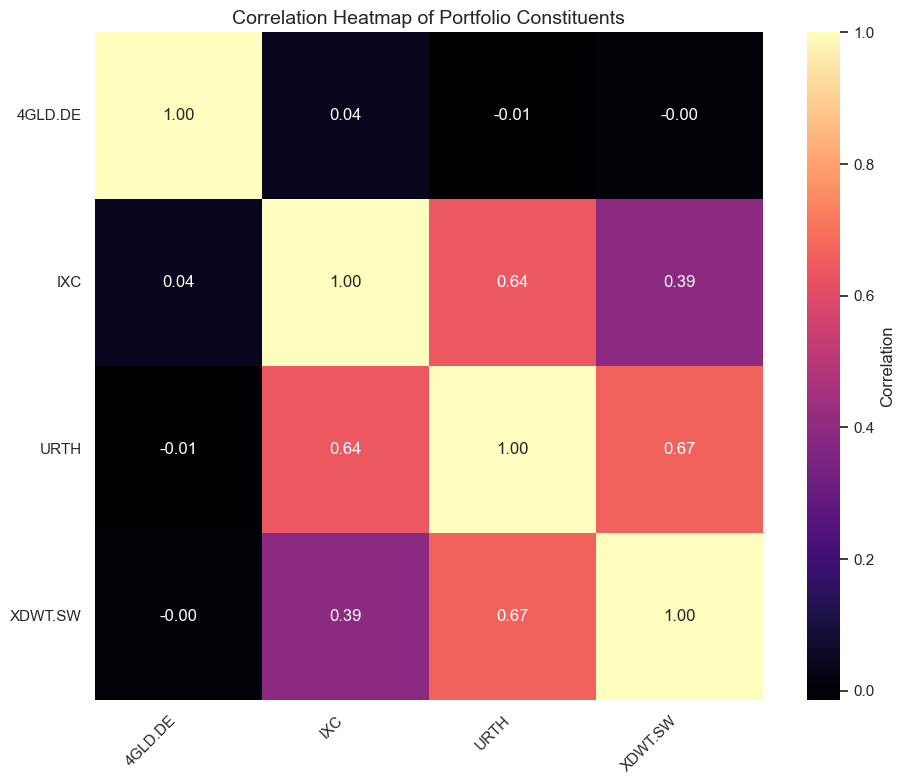

In [ ]:
# Calculate daily returns for each security

# Remove prefix 'Close_', so only the ticker symbols remain
plot_portfolio_df.rename(columns=lambda x: x.replace("Close_", ""), inplace=True)
# Exclude 'Portfolio_Value' and 'Portfolio_Daily_Return' from the return calculation
security_returns = plot_portfolio_df.iloc[:, :-2].pct_change().fillna(0)

# --- Interactive Stacked Area Chart for Value Contributions ---

# Value Contribution == "What drives your portfolio"
# USEAGE: Helps spot dominant assets
# INSIGHT: Reveals imbalances → apply targeted countermeasurements 
fig_value = go.Figure()

# Loop through each individual security's allocation over time
for col in plot_portfolio_df.columns[:-2]:
    fig_value.add_trace(go.Scatter(
        x=plot_portfolio_df.index,
        y=plot_portfolio_df[col],
        mode='lines',
        stackgroup='one',     # Enables stacking
        name=col              # Label in legend
    ))

fig_value.update_layout(
    title='Portfolio Value Contribution Over Time',
    xaxis_title='Date',
    yaxis_title='Value (€)',
    legend_title='Securities',
    hovermode='x unified'
)

# --- Correlation Heatmap of Securities ---

# Compute correlation matrix from daily returns
correlation_matrix = security_returns.corr()

# Set visual style
sns.set(style="white")

# Create a matplotlib figure
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="magma", fmt=".2f", square=True, cbar_kws={'label': 'Correlation'})

plt.title("Correlation Heatmap of Portfolio Constituents", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

fig_value.show()
plt.show()
